# Importing Packages

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Neural network utilities
from keras.models import Sequential # # create a linear stack of neural network layers.
from keras.layers import Dense, Dropout # is a module that provides various layer types, including Dense and Dropout, used to define the architecture of the neural network.
from keras.callbacks import EarlyStopping, ModelCheckpoint # callback is used to monitor the validation loss during training.
#If the validation loss stops improving for a specified number of epochs (in this case, 10), training is stopped early. This helps prevent overfitting


In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [7]:
# now dropping the missing values
df.dropna(axis = 0, inplace = True)

In [8]:
df.shape

(20433, 10)

In [9]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [10]:
df['ocean_proximity'] = df['ocean_proximity'].map({"<1H OCEAN": 0, "INLAND": 1, "NEAR OCEAN": 2, "NEAR BAY": 3, "ISLAND": 4})

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


# Train Test Split

In [19]:
y = df['median_house_value']
x = df.drop('median_house_value', axis = 1)
print(X.shape)
print(y.shape)

(20433, 9)
(20433,)


In [20]:
# now to train the model converting from pandas to numpy
x = np.array(x)
y= np.array(y)

In [21]:
# now the train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(15324, 9)
(5109, 9)
(15324,)
(5109,)


In [25]:
# Now scaling the features for the building the neural network
# Using the min max scaler

min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

In [27]:
print(x_train)
print(x_test)

[[0.54048583 0.30393199 0.19607843 ... 0.31540865 0.08351609 0.25      ]
 [0.74797571 0.01806589 0.33333333 ... 0.09044565 0.13494986 0.        ]
 [0.61032389 0.08607864 0.50980392 ... 0.05426739 0.11434325 1.        ]
 ...
 [0.60020243 0.15621679 0.80392157 ... 0.05936524 0.1792458  0.        ]
 [0.23380567 0.53453773 0.21568627 ... 0.17365565 0.33020234 0.75      ]
 [0.19433198 0.55154091 1.         ... 0.10623253 0.23403125 0.75      ]]
[[0.71963563 0.02656748 0.37254902 ... 0.041605   0.185094   0.5       ]
 [0.3097166  0.58129649 0.01960784 ... 0.15721099 0.27497552 0.25      ]
 [0.62854251 0.1466525  0.58823529 ... 0.13155731 0.18784568 0.        ]
 ...
 [0.33906883 0.54410202 0.82352941 ... 0.06923203 0.19056979 0.25      ]
 [0.25910931 0.65249734 0.45098039 ... 0.14191745 0.15909436 0.25      ]
 [0.35020243 0.53134963 0.56862745 ... 0.01874692 0.12192935 0.25      ]]


In [30]:
x_train.shape[1]

9

# Building the Artificial Neural Network (Tensorflow & Keras)

In [36]:
model = Sequential([
    #input layer
    Dense(1000, input_shape = (x_train.shape[1],), activation = 'relu'),
    Dropout(0.2),

    # # Two hiden layers
    Dense(500, activation = 'relu'),
    Dropout(0.2),
    Dense(250, activation = 'relu'),
    Dropout(0.2),

    # Output layer
    Dense(1, activation = 'linear') # 1 means continuous values
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1000)           │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,001 (2.43 MB)

 Trainable params: 636,001 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
"""
Total Parameters: The "Total params" section indicates that the model has a total of 636,001 parameters. These are the weights and biases that the model will learn during training.

Trainable Parameters: The "Trainable params" section shows that all 636,001 parameters in the model are trainable, meaning they will be updated and adjusted during training to optimize the model's performance.

Non-trainable Parameters: The "Non-trainable params" section is typically 0, which means there are no parameters that won't be updated during training.
"""

'\nTotal Parameters: The "Total params" section indicates that the model has a total of 636,001 parameters. These are the weights and biases that the model will learn during training.\n\nTrainable Parameters: The "Trainable params" section shows that all 636,001 parameters in the model are trainable, meaning they will be updated and adjusted during training to optimize the model\'s performance.\n\nNon-trainable Parameters: The "Non-trainable params" section is typically 0, which means there are no parameters that won\'t be updated during training.\n'

In [38]:
# Compiling the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
es = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1, mode = 'min')

In [43]:
# Fitting the ANN model

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [es], epochs = 10, batch_size = 50, verbose = 1)

Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 4801719296.0000 - mean_absolute_error: 49689.5938 - val_loss: 4573464576.0000 - val_mean_absolute_error: 48948.4922
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 4778722816.0000 - mean_absolute_error: 49150.8945 - val_loss: 4570442752.0000 - val_mean_absolute_error: 50236.3320
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 4814273024.0000 - mean_absolute_error: 49590.4023 - val_loss: 4473168384.0000 - val_mean_absolute_error: 49430.3086
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 4733981184.0000 - mean_absolute_error: 48630.1328 - val_loss: 4411714048.0000 - val_mean_absolute_error: 48719.2500
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 4501926912.0000 - mean_absolute_error: 47850.3828 - val_loss: 4390850048.0000 - val_mean_absolute_error: 46583.1016
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 4438964224.0000 - mean_absolute_error: 46989.8203 - v

# Metrics & Score

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

y_pred = model.predict(x_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("MAE : ", mean_squared_log_error(y_test, y_pred))
print("R2 Score : ", r2_score(y_test, y_pred))

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MAE : 46207.34871041759
MSE : 4269786462.490007
MAE :  0.0997563843967485
R2 Score :  0.6843934131899521


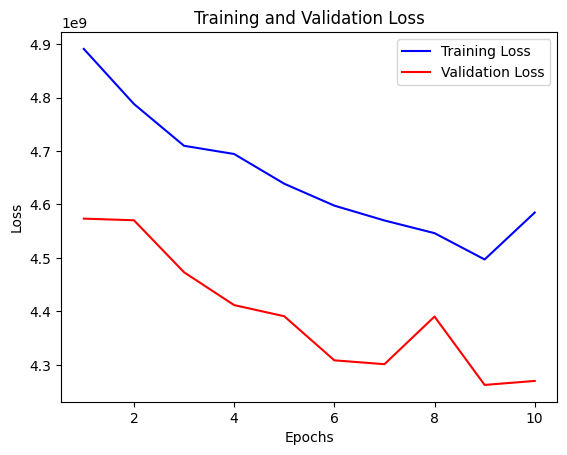

In [48]:
# Get the training and validation loss from the history

training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')

# Label the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()


479/479 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


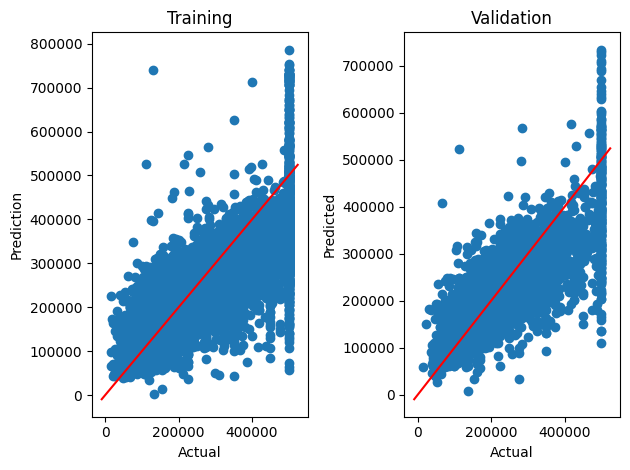

In [49]:
# Specify the dimensions
fig, axes = plt.subplots(1,2)

# This makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(x_train))
axes[0].set_xlabel('Actual', fontsize=10)
axes[0].set_ylabel('Prediction', fontsize=10)
axes[0].set_title('Training')

# Add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Validation Results
axes[1].scatter(x=y_test, y=model.predict(x_test))
axes[1].set_xlabel('Actual', fontsize=10)
axes[1].set_ylabel('Predicted', fontsize=10)
axes[1].set_title('Validation')

# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# Tight layout
fig.tight_layout()
plt.show()

# Building the Predictive System

In [51]:
def pred(longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity):
  features = np.array([longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity])
  features_scaled = min_max_scaler.transform([features])
  result = model.predict(features_scaled)

  return result[0]

In [60]:
# now predicating the output

longitude = -122.2300
latitude  = 37.8800
housing_median_age  = 41.0000
total_rooms        = 520.0000
total_bedrooms   =  250.0000
population     = 322.0000
households          =    126.0000
median_income       =      8.3252
ocean_proximity       =     3.0000

price = pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [64]:
print("The price of the house is :", price)

The price of the house is : [437409.12]


# Save The ANN Model

In [67]:
model.save("model_ann.keras")

import pickle
pickle.dump(min_max_scaler, open('min_max_scaler.pkl', 'wb'))